In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [2]:
# Carregar o DataFrame original
df = pd.read_excel('C:/Users/Patyc/OneDrive/Desktop/Dissertation/Data/Skin_clean and treated/Skin_clean.xlsx')

# Converter a data para datetime
df['Screening_date'] = pd.to_datetime(df['Screening_date'])

# Criar um DataFrame com o total de rastreios por data
total_screenings_df = df.groupby('Screening_date').size().reset_index(name='Total_screenings')

total_screenings_df

,Screening_date,Total_screenings
0,2022-03-03,92
1,2022-03-19,62
2,2022-03-26,90
3,2022-04-04,69
4,2022-04-09,70
...,...,...
85,2024-03-23,168
86,2024-03-30,198
87,2024-04-06,242
88,2024-04-20,186


In [3]:
# Criar um intervalo de datas completo
min_date = df['Screening_date'].min()
max_date = df['Screening_date'].max()
date_range = pd.date_range(start=min_date, end=max_date)

# Criar um DataFrame com todas as datas do intervalo
all_dates_df = pd.DataFrame(date_range, columns=['Screening_date'])

# Fazer o merge de total_screenings_df com all_dates_df
complete_screenings_df = all_dates_df.merge(total_screenings_df, on='Screening_date', how='left')

# Substituir os valores ausentes por 0
complete_screenings_df['Total_screenings'] = complete_screenings_df['Total_screenings'].fillna(0).astype(int)

print(complete_screenings_df)

    Screening_date  Total_screenings
0       2022-03-03                92
1       2022-03-04                 0
2       2022-03-05                 0
3       2022-03-06                 0
4       2022-03-07                 0
..             ...               ...
782     2024-04-23                 0
783     2024-04-24                 0
784     2024-04-25                 0
785     2024-04-26                 0
786     2024-04-27               184

[787 rows x 2 columns]


In [4]:
df = complete_screenings_df

df

,Screening_date,Total_screenings
0,2022-03-03,92
1,2022-03-04,0
2,2022-03-05,0
3,2022-03-06,0
4,2022-03-07,0
...,...,...
782,2024-04-23,0
783,2024-04-24,0
784,2024-04-25,0
785,2024-04-26,0


In [5]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Supondo que 'complete_screenings_df' já foi criado conforme você descreveu
# Executar o teste ADF
result = adfuller(complete_screenings_df['Total_screenings'])

# Extrair e imprimir os resultados
adf_statistic = result[0]
p_value = result[1]
used_lag = result[2]
n_observations = result[3]
critical_values = result[4]

print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)
print('Used Lag:', used_lag)
print('Number of Observations:', n_observations)
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')
    
# Interpretação dos resultados
if p_value < 0.05:
    print("Rejeitamos a hipótese nula: a série é estacionária.")
else:
    print("Não rejeitamos a hipótese nula: a série não é estacionária.")


ADF Statistic: -2.996532692807403
p-value: 0.03521947433465731
Used Lag: 20
Number of Observations: 766
Critical Values:
   1%: -3.438915730045254
   5%: -2.8653205426302253
   10%: -2.5687831424305845
Rejeitamos a hipótese nula: a série é estacionária.


# LINEAR REGRESSION MODEL

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Preparar os dados para a Regressão Linear
df = df.sort_values(by='Screening_date')
X = np.array(range(len(df))).reshape(-1, 1)  # Usando índices temporais como característica
y = df['Total_screenings'].values

Modelo: LR
MAE: 77.12491982300166
MSE: 8362.473527877735
RMSE: 91.44656105003476
R2: -0.7932715440685649
ME: 59.919699184021425
MAV: 125.83333333333333
MPV: 1.3193731799736885
RME: -0.522384414335571
RMAE: 1.3193731799736885


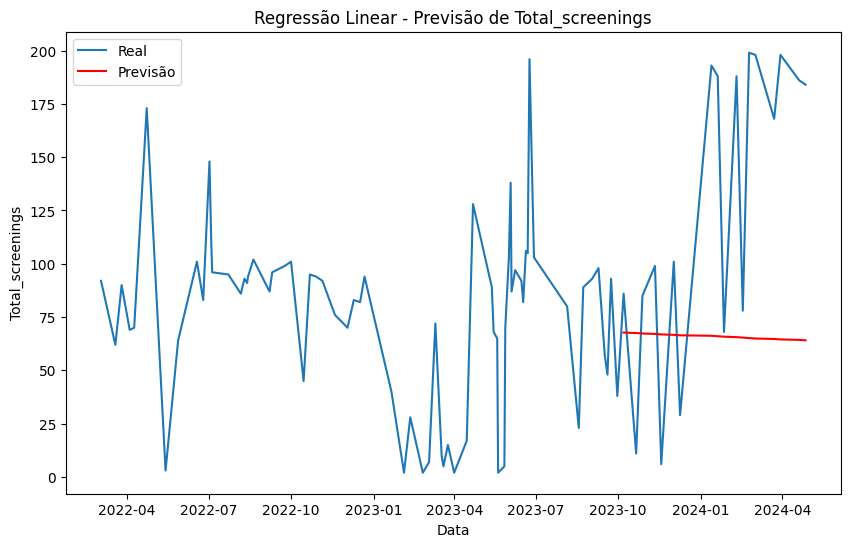

In [31]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Treinar o modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Calcular e imprimir as métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
me = np.mean(y_test - y_pred)
mav = np.mean(np.abs(y_test))
mpv = np.mean(np.abs((y_test - y_pred) / y_test))
rme = np.mean((y_test - y_pred) / y_test)
rmae = np.mean(np.abs(y_test - y_pred) / np.abs(y_test))

print("Modelo: LR")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'ME: {me}')
print(f'MAV: {mav}')
print(f'MPV: {mpv}')
print(f'RME: {rme}')
print(f'RMAE: {rmae}')

# shuffle
# Modelo: LR
# MAE: 25.625800294775303
# MSE: 3877.1143494907756
# RMSE: 62.266478537739516
# R2: -0.023485779065605783
# ME: 9.462412020206624
# MAV: 18.455696202531644
# MPV: inf
# RME: -inf
# RMAE: inf

# Visualizar os resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['Screening_date'], y, label='Real')
plt.plot(df['Screening_date'][len(X_train):], y_pred, label='Previsão', color='red')
plt.xlabel('Data')
plt.ylabel('Total_screenings')
plt.title('Regressão Linear - Previsão de Total_screenings')
plt.legend()
plt.show()

In [32]:
# Definindo as datas de corte
split_date = '2024-03-01'

# Encontrar o índice correspondente à data de corte
split_index = df[df['Screening_date'] >= split_date].index[0]

# Dividindo os dados em treino e teste
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [34]:
# Treinar o modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Calcular e imprimir as métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
me = np.mean(y_test - y_pred)
mav = np.mean(np.abs(y_test))
mpv = np.mean(np.abs((y_test - y_pred) / y_test))
rme = np.mean((y_test - y_pred) / y_test)
rmae = np.mean(np.abs(y_test - y_pred) / np.abs(y_test))

print("Modelo: LR")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'ME: {me}')
print(f'MAV: {mav}')
print(f'MPV: {mpv}')
print(f'RME: {rme}')
print(f'RMAE: {rmae}')

# Modelo: LR split
# MAE: 36.084616022255766
# MSE: 6400.606786224973
# RMSE: 80.00379232402032
# R2: -0.0403045607988628
# ME: 15.741558692361714
# MAV: 27.310344827586206
# MPV: inf
# RME: -inf
# RMAE: inf


Modelo: LR
MAE: 91.2028882078838
MSE: 8429.611057161897
RMSE: 91.81291334644543
R2: -72.94395664177102
ME: 91.2028882078838
MAV: 184.0
MPV: 0.49397237719994763
RME: 0.49397237719994763
RMAE: 0.49397237719994763


VVS RELAÇÃO LINEAR?

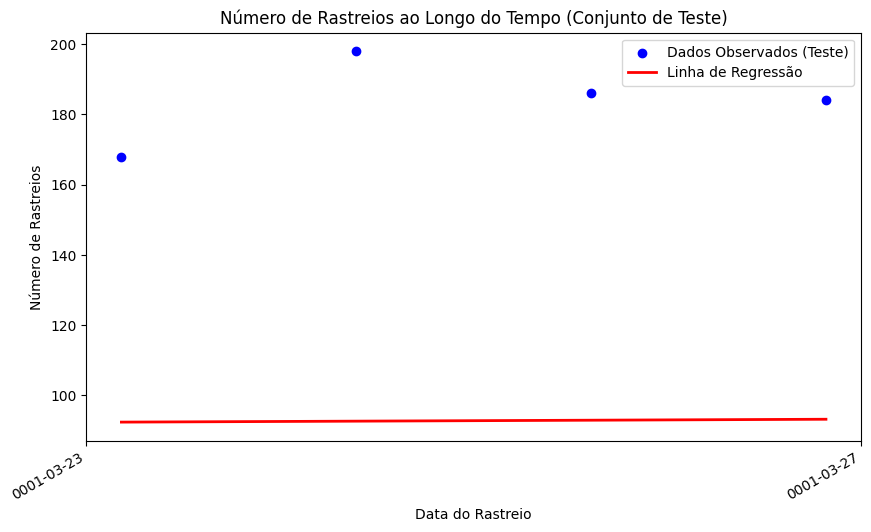

In [35]:
import matplotlib.dates as mdates

# Converta X_test de volta para datas para plotagem
dates_test = [pd.Timestamp.fromordinal(int(date)) for date in X_test.flatten()]

# Crie o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(dates_test, y_test, color='blue', label='Dados Observados (Teste)')

# Plote a linha de regressão
plt.plot(dates_test, y_pred, color='red', linewidth=2, label='Linha de Regressão')

# Formatação do eixo de datas para melhor visualização
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

# Adicione título e rótulos aos eixos
plt.title('Número de Rastreios ao Longo do Tempo (Conjunto de Teste)')
plt.xlabel('Data do Rastreio')
plt.ylabel('Número de Rastreios')

# Adicione uma legenda
plt.legend()

# Mostre o gráfico
plt.show()

a regressão linear simples parece não capturar bem a relação

testar outra vv sem ser 'Screening_date' - 'days since start'

In [38]:
# Calcule o número de dias desde a primeira data de rastreio
df['days_since_start'] = (df['Screening_date'] - df['Screening_date'].min()).dt.days

# Exiba o DataFrame atualizado
print(df.head())

  Screening_date  Total_screenings  days_since_start
0     2022-03-03                92                 0
1     2022-03-19                62                16
2     2022-03-26                90                23
3     2022-04-04                69                32
4     2022-04-09                70                37


LR again

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [43]:
# Supondo que o DataFrame 'df' já esteja ordenado e com a nova coluna 'days_since_start'
# Definir X como 'days_since_start' e y como 'Total_screenings'
X = df['days_since_start'].values.reshape(-1, 1)
y = df['Total_screenings'].values

# Dividir os dados em conjuntos de treinamento e teste (80% treinamento e 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = False)

# Ajustar o modelo de Regressão Linear ao conjunto de treinamento
model = LinearRegression()
model.fit(X_train, y_train)

# Gerar previsões para o conjunto de teste
y_pred = model.predict(X_test)

In [44]:
# Calcular e imprimir as métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
me = np.mean(y_test - y_pred)
mav = np.mean(np.abs(y_test))
mpv = np.mean(np.abs((y_test - y_pred) / y_test))
rme = np.mean((y_test - y_pred) / y_test)
rmae = np.mean(np.abs(y_test - y_pred) / np.abs(y_test))

print("Modelo: LR")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'ME: {me}')
print(f'MAV: {mav}')
print(f'MPV: {mpv}')
print(f'RME: {rme}')
print(f'RMAE: {rmae}')


Modelo: LR
MAE: 25.625800294775303
MSE: 3877.1143494907756
RMSE: 62.266478537739516
R2: -0.023485779065605783
ME: 9.462412020206624
MAV: 18.455696202531644
MPV: inf
RME: -inf
RMAE: inf


C:\Users\Patyc\AppData\Local\Temp\ipykernel_29916\710375064.py:8: RuntimeWarning: divide by zero encountered in divide
  mpv = np.mean(np.abs((y_test - y_pred) / y_test))
C:\Users\Patyc\AppData\Local\Temp\ipykernel_29916\710375064.py:9: RuntimeWarning: divide by zero encountered in divide
  rme = np.mean((y_test - y_pred) / y_test)
C:\Users\Patyc\AppData\Local\Temp\ipykernel_29916\710375064.py:10: RuntimeWarning: divide by zero encountered in divide
  rmae = np.mean(np.abs(y_test - y_pred) / np.abs(y_test))


# LSTM MODEL

In [39]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import LSTM, Dense # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
from sklearn.preprocessing import MinMaxScaler

In [40]:
# Supondo que seu dataframe seja chamado df e a coluna de interesse seja 'Total_screenings'
data = df[['Total_screenings']].values

# Normalizando os dados para ficar entre 0 e 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Função para criar sequências para o LSTM
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

# Definir o comprimento da sequência (número de passos de tempo usados para prever o próximo valor)
seq_length = 10
x, y = create_sequences(scaled_data, seq_length)

# Remodelando os dados para a forma [amostras, tempo, características]
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

# Dividindo os dados em treino e teste
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20


c:\Users\Patyc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.1816
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1272
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0801 
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0553 
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0375
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0414 
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0515 
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0475
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0444
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0418 
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0366
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0439 
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0446 
Epoch 14/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0377 
Epoch 15/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0401 
Epoch 16/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/s

In [41]:
# Fazer previsões
y_pred = model.predict(x_test)

# Desnormalizar as previsões para o formato original
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calcular e imprimir as métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
me = np.mean(y_test - y_pred)
mav = np.mean(np.abs(y_test))
mpv = np.mean(np.abs((y_test - y_pred) / y_test))
rme = np.mean((y_test - y_pred) / y_test)
rmae = np.mean(np.abs(y_test - y_pred) / np.abs(y_test))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


In [42]:
print("Modelo: LSTM")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'ME: {me}')
print(f'MAV: {mav}')
print(f'MPV: {mpv}')
print(f'RME: {rme}')
print(f'RMAE: {rmae}')

# # Modelo: LSTM shuffle
# MAE: 28.488186090420452
# MSE: 3894.930423798179
# RMSE: 62.40937769116256
# R2: -0.01634544461326315
# ME: 6.330059063740266
# MAV: 18.692307692307693
# MPV: inf
# RME: -inf
# RMAE: inf

Modelo: LSTM
MAE: 61.78938150405884
MSE: 5163.546799629443
RMSE: 71.85782351024447
R2: -0.22087703257087465
ME: 45.25500535964966
MAV: 135.5
MPV: 1.1110199616179004
RME: -0.5050669906692471
RMAE: 1.1110199616179004


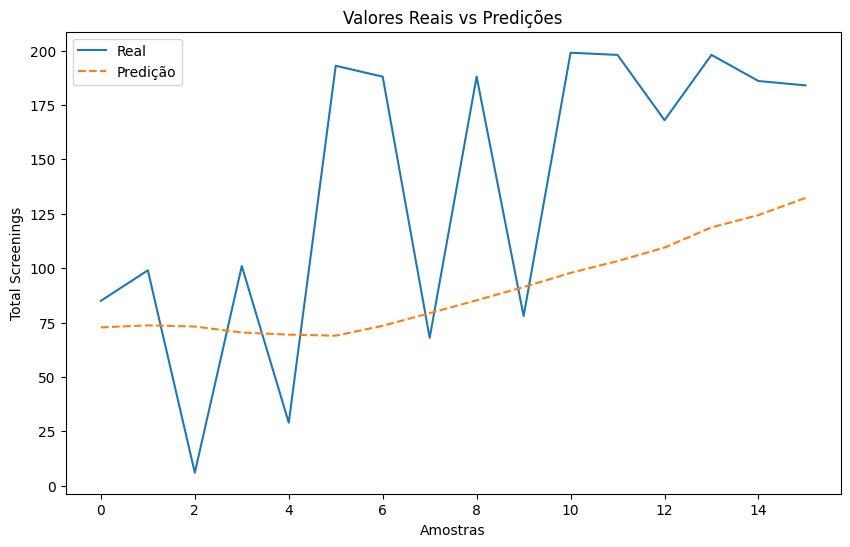

In [43]:
# Plotando os valores reais vs previsões
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Real')
plt.plot(y_pred, label='Predição', linestyle='--')
plt.title('Valores Reais vs Predições')
plt.xlabel('Amostras')
plt.ylabel('Total Screenings')
plt.legend()
plt.show()

In [44]:
# Definir a data de corte
split_date = '2024-03-01'

# Criar os conjuntos de treino e teste
train_data = df[df['Screening_date'] < split_date]
test_data = df[df['Screening_date'] >= split_date]

#  Normalizando os dados para ficarem entre 0 e 1
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data[['Total_screenings']].values)
test_scaled = scaler.transform(test_data[['Total_screenings']].values)

# Criando sequências para o LSTM
seq_length = 10
x_train, y_train = create_sequences(train_scaled, seq_length)
x_test, y_test = create_sequences(test_scaled, seq_length)

# Remodelando os dados para a forma [amostras, tempo, características]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Criando e treinando o modelo
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, epochs=20, batch_size=32)

# Fazer previsões
y_pred = model.predict(x_test)


IndexError: tuple index out of range

In [16]:
# Desnormalizar as previsões para o formato original
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calcular e imprimir as métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Modelo: LSTM")
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

Modelo: LSTM
MAE: 36.93393316057821
RMSE: 81.1233291740775
R2: 0.015580277054587865


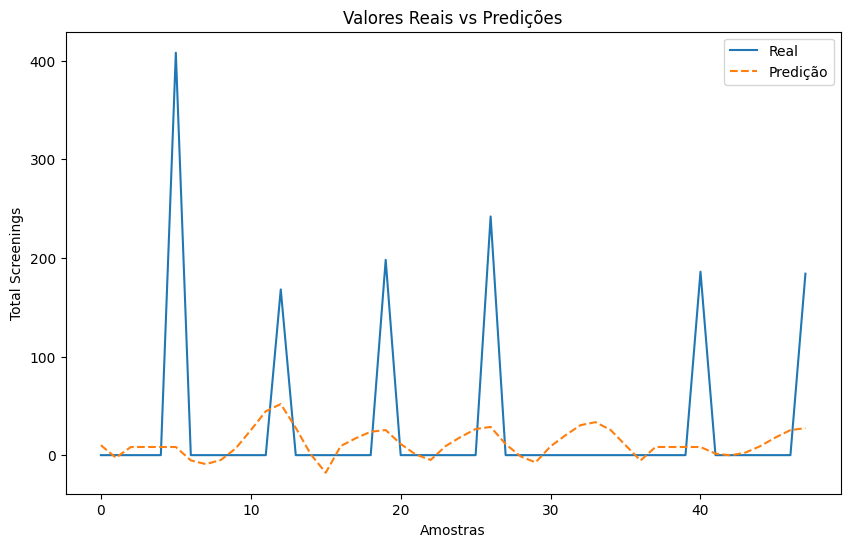

In [17]:
# Plotando os valores reais vs previsões
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Real')
plt.plot(y_pred, label='Predição', linestyle='--')
plt.title('Valores Reais vs Predições')
plt.xlabel('Amostras')
plt.ylabel('Total Screenings')
plt.legend()
plt.show()